<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Import Folder

In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

In [27]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

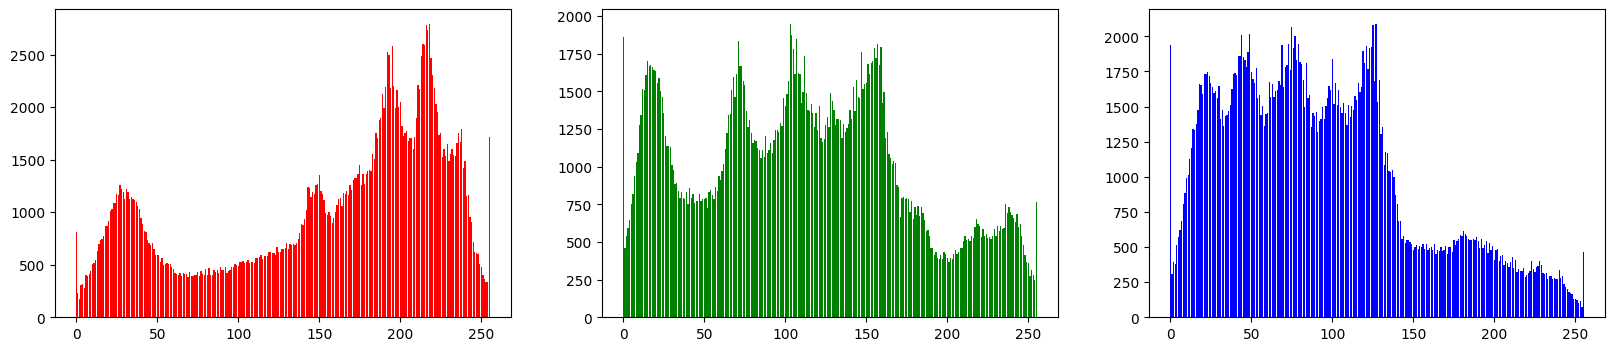

In [28]:
# Input Image
img = io.imread('/content/drive/MyDrive/images/lena.jpg')

# Hitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

# Inisialisasi array histogram
ht_r, ht_g, ht_b = [np.zeros(256, dtype=int) for _ in range(3)]

# Iterasi setiap pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    # Dapatkan nilai RGB
    r = img[y, x, 0] # Red channel
    g = img[y, x, 1] # Green channel
    b = img[y, x, 2] # Blue channel

    ht_r[r] += 1
    ht_g[g] += 1
    ht_b[b] += 1

# Tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), ht_r, color='r')

plt.subplot(132)
plt.bar(range(256), ht_g, color='g')

plt.subplot(133)
plt.bar(range(256), ht_b, color='b')

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?\
Jawab :\
Ya, Sama

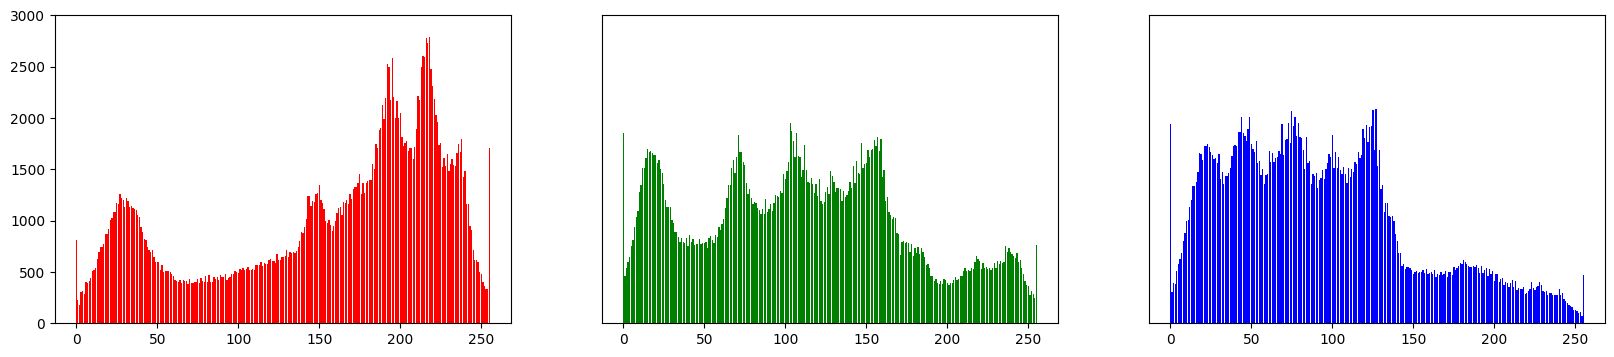

In [29]:
# Membuat histogram dengan numpy
ht_r, ht_g, ht_b = [np.histogram(img[:,:,i], 256, [0, 256])[0] for i in range(3)]

# Tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), ht_r, color='r')
plt.ylim(0, 3000)

plt.subplot(132)
plt.bar(range(256), ht_g, color='g')
plt.ylim(0, 3000)
plt.yticks([])

plt.subplot(133)
plt.bar(range(256), ht_b, color='b')
plt.ylim(0, 3000)
plt.yticks([])

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [42]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
  ht = np.zeros(256)
  for i in range(image_channel.shape[0]):
    for j in range(image_channel.shape[1]):
        ht[image_channel[i, j]] += 1
  return ht

# Fungsi untuk menghitung cumulative distribution function
def compute_cdf(ht):
  cdf = np.cumsum(ht)
  cdf_normalized = cdf / cdf[-1]
  return cdf_normalized

# Fungsi untuk melakukan histogram equalization pada setiap channel
def histogram_equalization(image_channel):
  ht = compute_histogram(image_channel)
  cdf = compute_cdf(ht)
  cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

  equalized_channel = np.zeros_like(image_channel)
  for i in range(image_channel.shape[0]):
    for j in range(image_channel.shape[1]):
        equalized_channel[i, j] = cdf_normalized[image_channel[i, j]]

  return equalized_channel

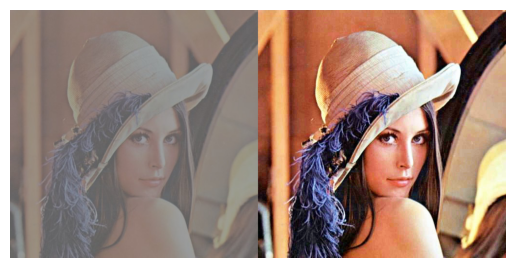

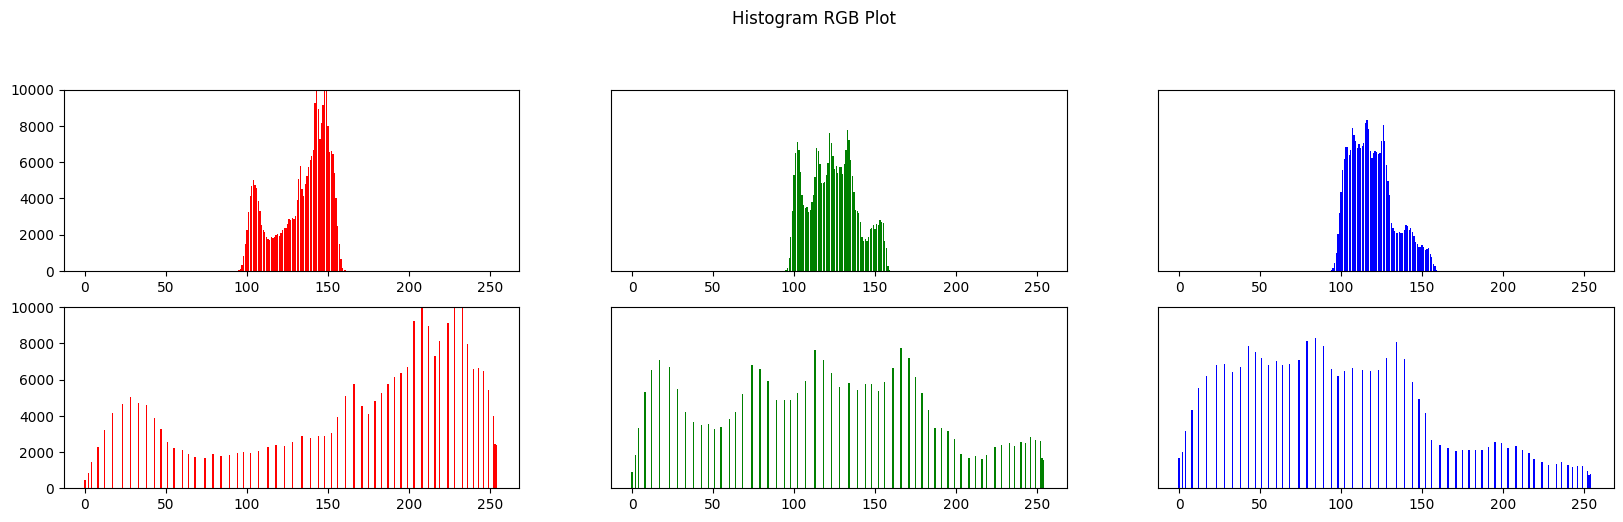

In [55]:
lena_lc = io.imread('/content/drive/MyDrive/images/lena_lc.jpg')

lena_lc_ht = compute_histogram(lena_lc)

equalized_img = histogram_equalization(lena_lc)

final_frame = cv.hconcat([lena_lc, equalized_img])

plt.imshow(final_frame)
plt.axis('off')
plt.show()
print()

# Menampilkan Histogram

R = lena_lc[:,:,0]
G = lena_lc[:,:,1]
B = lena_lc[:,:,2]

ht_r = compute_histogram(R)
ht_g = compute_histogram(G)
ht_b = compute_histogram(B)

channels = [ht_r, ht_g, ht_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))
plt.suptitle("Histogram RGB Plot")

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel,color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(equalized_img[:,:,i]),color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

plt.show()